In [22]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [23]:
# Questions- 
#Data Cleaning,transformation - all the cells with energy generated 0 will be removed, only required columns will be kept.spliitig
#time and date data
    
#1.Hyothesis Testing
   
#2.Regression Analysis
# a.  which source will generate maximum Energy  in the year 2019 
#    For this we will apply regression analysis and calculate energy generated from different sources throughout the year.
#    Add energy generated for respective sources throughout the yea and find then find out from which source maximum energy was generated
    


In [24]:
energy=pd.read_csv('energy_dataset.csv')
energy.tail(10)

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
35054,2018-12-31 14:00:00+01:00,297.0,0.0,0.0,6062.0,2698.0,212.0,0.0,0.0,0.0,...,294.0,0.0,2289.0,3997.0,NaN,2084.0,27749.0,27988.0,64.97,71.95
35055,2018-12-31 15:00:00+01:00,295.0,0.0,0.0,6128.0,2501.0,178.0,0.0,0.0,0.0,...,287.0,0.0,2233.0,3763.0,NaN,2101.0,26955.0,27009.0,64.18,70.85
35056,2018-12-31 16:00:00+01:00,300.0,0.0,0.0,6379.0,2503.0,178.0,0.0,0.0,0.0,...,294.0,0.0,2267.0,2841.0,NaN,2283.0,26527.0,26449.0,64.80,71.36
35057,2018-12-31 17:00:00+01:00,298.0,0.0,0.0,6892.0,2583.0,177.0,0.0,0.0,0.0,...,296.0,0.0,2550.0,1318.0,NaN,2607.0,27293.0,26738.0,68.01,75.13
35058,2018-12-31 18:00:00+01:00,293.0,0.0,0.0,7593.0,2604.0,178.0,0.0,0.0,0.0,...,289.0,0.0,2952.0,300.0,NaN,3028.0,29690.0,29592.0,68.58,77.61
35059,2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,...,277.0,0.0,3113.0,96.0,NaN,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,...,280.0,0.0,3288.0,51.0,NaN,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,...,286.0,0.0,3503.0,36.0,NaN,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,...,287.0,0.0,3586.0,29.0,NaN,3273.0,25450.0,25801.0,63.93,69.89
35063,2018-12-31 23:00:00+01:00,290.0,0.0,0.0,6926.0,2166.0,163.0,0.0,0.0,0.0,...,287.0,0.0,3651.0,26.0,NaN,3117.0,24424.0,24455.0,64.27,69.88


In [25]:
energy.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [26]:
#dropping columns which are not needed,having NaN values or having value 0
energy_new=energy.drop(['generation fossil brown coal/lignite','price day ahead',
'price actual','generation fossil coal-derived gas','generation fossil hard coal','generation fossil oil shale','generation marine','generation fossil peat','generation geothermal','generation hydro pumped storage aggregated','generation other','generation other renewable','generation wind offshore','forecast wind offshore eday ahead'], axis = 1) 
energy_new['index']=np.arange(35064)

In [27]:
#Selecting data for only 2017 and 2018
# energy_new["time"].str.split("-",  expand = True) 
#Selecting data for only 2017 and 2018
energy_time=energy_new["time"].str.split("-", expand=True)

In [28]:
energy_time['index']=np.arange(35064)
energy_final=pd.merge(energy_new,energy_time,on='index')
energy_final1=energy_final.set_index('index')
energy_final1.drop(['time'],axis=1,inplace=True)
energy_final2=energy_final1.rename(columns={0: 'Year',1:'Month',2:'Date and Time'})


In [29]:
columns=['Year',
'Month',
'Date and Time','generation biomass','generation fossil gas','generation fossil oil','generation hydro pumped storage consumption','generation hydro run-of-river and poundage','generation hydro water reservoir',
'generation nuclear',
'generation solar',
'generation waste',
'generation wind onshore',
'forecast solar day ahead',
'forecast wind onshore day ahead',
'total load forecast',
'total load actual'
]

In [30]:
energy_final2.drop(energy_final2.index[0:8760],axis=0,inplace=True) 
energy_final3=energy_final2.reindex(columns=columns)
energy_final3

,Year,Month,Date and Time,generation biomass,generation fossil gas,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual
index,,,,,,,,,,,,,,,,,
8760,2016,01,01 00:00:00+01:00,410.0,4610.0,218.0,564.0,685.0,1662.0,7080.0,20.0,115.0,3055.0,5.0,2923.0,23273.0,22431.0
8761,2016,01,01 01:00:00+01:00,404.0,4434.0,216.0,661.0,682.0,1840.0,7080.0,20.0,121.0,3333.0,4.0,3307.0,22495.0,21632.0
8762,2016,01,01 02:00:00+01:00,395.0,4286.0,205.0,1161.0,660.0,1343.0,7079.0,20.0,122.0,3698.0,4.0,3681.0,21272.0,20357.0
8763,2016,01,01 03:00:00+01:00,391.0,3813.0,202.0,2051.0,651.0,906.0,7080.0,20.0,122.0,4324.0,4.0,4053.0,20022.0,19152.0
8764,2016,01,01 04:00:00+01:00,384.0,3872.0,200.0,3050.0,626.0,545.0,7078.0,20.0,119.0,5112.0,4.0,4908.0,19148.0,18310.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018,12,31 19:00:00+01:00,297.0,7634.0,178.0,1.0,1135.0,4836.0,6073.0,85.0,277.0,3113.0,96.0,3253.0,30619.0,30653.0
35060,2018,12,31 20:00:00+01:00,296.0,7241.0,174.0,1.0,1172.0,3931.0,6074.0,33.0,280.0,3288.0,51.0,3353.0,29932.0,29735.0
35061,2018,12,31 21:00:00+01:00,292.0,7025.0,168.0,50.0,1148.0,2831.0,6076.0,31.0,286.0,3503.0,36.0,3404.0,27903.0,28071.0


In [31]:
index=np.arange(26304)

In [32]:
index

array([    0,     1,     2, ..., 26301, 26302, 26303])

In [33]:
energy_final3['index']=index

In [34]:
energy_final3.set_index('index')

,Year,Month,Date and Time,generation biomass,generation fossil gas,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual
index,,,,,,,,,,,,,,,,,
0,2016,01,01 00:00:00+01:00,410.0,4610.0,218.0,564.0,685.0,1662.0,7080.0,20.0,115.0,3055.0,5.0,2923.0,23273.0,22431.0
1,2016,01,01 01:00:00+01:00,404.0,4434.0,216.0,661.0,682.0,1840.0,7080.0,20.0,121.0,3333.0,4.0,3307.0,22495.0,21632.0
2,2016,01,01 02:00:00+01:00,395.0,4286.0,205.0,1161.0,660.0,1343.0,7079.0,20.0,122.0,3698.0,4.0,3681.0,21272.0,20357.0
3,2016,01,01 03:00:00+01:00,391.0,3813.0,202.0,2051.0,651.0,906.0,7080.0,20.0,122.0,4324.0,4.0,4053.0,20022.0,19152.0
4,2016,01,01 04:00:00+01:00,384.0,3872.0,200.0,3050.0,626.0,545.0,7078.0,20.0,119.0,5112.0,4.0,4908.0,19148.0,18310.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26299,2018,12,31 19:00:00+01:00,297.0,7634.0,178.0,1.0,1135.0,4836.0,6073.0,85.0,277.0,3113.0,96.0,3253.0,30619.0,30653.0
26300,2018,12,31 20:00:00+01:00,296.0,7241.0,174.0,1.0,1172.0,3931.0,6074.0,33.0,280.0,3288.0,51.0,3353.0,29932.0,29735.0
26301,2018,12,31 21:00:00+01:00,292.0,7025.0,168.0,50.0,1148.0,2831.0,6076.0,31.0,286.0,3503.0,36.0,3404.0,27903.0,28071.0


In [35]:
energy_final3['energy produced']=energy_final3['generation biomass']+energy_final3['generation fossil gas']+energy_final3['generation fossil oil']+energy_final3['generation hydro pumped storage consumption']+ energy_final3['generation hydro run-of-river and poundage']+energy_final3['generation hydro water reservoir']
+ energy_final3['generation nuclear']
+energy_final3['generation solar']
+energy_final3['generation waste']
+energy_final3['generation wind onshore']


index
8760     3055.0
8761     3333.0
8762     3698.0
8763     4324.0
8764     5112.0
          ...  
35059    3113.0
35060    3288.0
35061    3503.0
35062    3586.0
35063    3651.0
Name: generation wind onshore, Length: 26304, dtype: float64

In [36]:
energy_final3

,Year,Month,Date and Time,generation biomass,generation fossil gas,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,index,energy produced
index,,,,,,,,,,,,,,,,,,,
8760,2016,01,01 00:00:00+01:00,410.0,4610.0,218.0,564.0,685.0,1662.0,7080.0,20.0,115.0,3055.0,5.0,2923.0,23273.0,22431.0,0,8149.0
8761,2016,01,01 01:00:00+01:00,404.0,4434.0,216.0,661.0,682.0,1840.0,7080.0,20.0,121.0,3333.0,4.0,3307.0,22495.0,21632.0,1,8237.0
8762,2016,01,01 02:00:00+01:00,395.0,4286.0,205.0,1161.0,660.0,1343.0,7079.0,20.0,122.0,3698.0,4.0,3681.0,21272.0,20357.0,2,8050.0
8763,2016,01,01 03:00:00+01:00,391.0,3813.0,202.0,2051.0,651.0,906.0,7080.0,20.0,122.0,4324.0,4.0,4053.0,20022.0,19152.0,3,8014.0
8764,2016,01,01 04:00:00+01:00,384.0,3872.0,200.0,3050.0,626.0,545.0,7078.0,20.0,119.0,5112.0,4.0,4908.0,19148.0,18310.0,4,8677.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018,12,31 19:00:00+01:00,297.0,7634.0,178.0,1.0,1135.0,4836.0,6073.0,85.0,277.0,3113.0,96.0,3253.0,30619.0,30653.0,26299,14081.0
35060,2018,12,31 20:00:00+01:00,296.0,7241.0,174.0,1.0,1172.0,3931.0,6074.0,33.0,280.0,3288.0,51.0,3353.0,29932.0,29735.0,26300,12815.0
35061,2018,12,31 21:00:00+01:00,292.0,7025.0,168.0,50.0,1148.0,2831.0,6076.0,31.0,286.0,3503.0,36.0,3404.0,27903.0,28071.0,26301,11514.0


In [37]:
energy_new.columns 

Index(['time', 'generation biomass', 'generation fossil gas',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation solar', 'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'index'],
      dtype='object')

In [38]:
energy_new=energy_final3['energy produced']

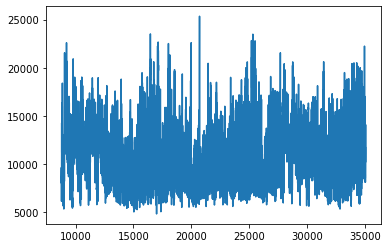

In [39]:
plt.plot(energy_final3['energy produced'])

In [40]:
energy_final3[(energy_final3['Year'=='2018'])|(energy_final3['Month'=='01'])|(energy_final3['Month'=='02'])|(energy_final3['Month'=='03'])|(energy_final3['Month'=='04'])|(energy_final3['Month'=='05'])|(energy_final3['Month'=='06'])| (energy_final3['Month'=='07'])|(energy_final3['Month'=='08' ])|(energy_final3['Month'=='09'])|(energy_final3['Month'=='10'])]

KeyError: False

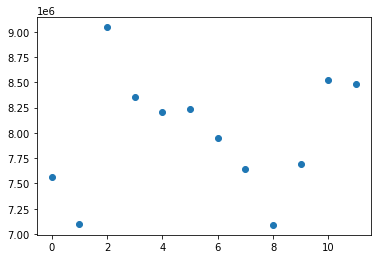

In [41]:
energy_2018=energy_final3[((energy_final3['Month']=='12')|(energy_final3['Month']=="11")|(energy_final3['Month']=='10')|(energy_final3['Month']=='09')|(energy_final3['Month']=='08') | (energy_final3['Month']=='07') | (energy_final3['Year']=='2016') | (energy_final3['Month']=='06') | (energy_final3['Month']=='05') | (energy_final3['Month']=='04') | (energy_final3['Month']=='03') | (energy_final3['Month']=='02') | (energy_final3['Month']=='01')) & (energy_final3['Year']=='2018')]
energy_1=energy_2018[energy_2018['Month']=='01'].sum()['energy produced']
energy_2=energy_2018[energy_2018['Month']=='02'].sum()['energy produced']
energy_3=energy_2018[energy_2018['Month']=='03'].sum()['energy produced']
energy_4=energy_2018[energy_2018['Month']=='04'].sum()['energy produced']
energy_5=energy_2018[energy_2018['Month']=='05'].sum()['energy produced']
energy_6=energy_2018[energy_2018['Month']=='06'].sum()['energy produced']
energy_7=energy_2018[energy_2018['Month']=='07'].sum()['energy produced']
energy_8=energy_2018[energy_2018['Month']=='08'].sum()['energy produced']
energy_9= energy_2018[energy_2018['Month']=='09'].sum()['energy produced']
energy_10=energy_2018[energy_2018['Month']=='10'].sum()['energy produced']
energy_11=energy_2018[energy_2018['Month']=='11'].sum()['energy produced']
energy_12=energy_2018[energy_2018['Month']=='12'].sum()['energy produced']
energy_data=pd.Series([energy_1,energy_2,energy_3,energy_4,energy_5,energy_6,energy_7,energy_8,energy_9,energy_10,energy_11,energy_12], index=[1,2,3,4,5,6,7,8,9,10,11,12])
df = pd.DataFrame(energy_data, columns = ['energy'])
df
index=np.arange(12)
df['index']=index
df.set_index('index')
plt.scatter(df['index'],df['energy'])

In [62]:
energy_2016_2=energy_final3[(energy_final3['Month']=='12')|(energy_final3['Month']=="11")|(energy_final3['Month']=='10')|(energy_final3['Month']=='09')|(energy_final3['Month']=='08') | (energy_final3['Month']=='07') | (energy_final3['Year']=='2016') | (energy_final3['Month']=='06') | (energy_final3['Month']=='05') | (energy_final3['Month']=='04') | (energy_final3['Month']=='03') | (energy_final3['Month']=='02') | (energy_final3['Month']=='01')]
energy_2017_2=energy_final3[(energy_final3['Month']=='08') | (energy_final3['Month']=='05') | (energy_final3['Year']=='2017') | (energy_final3['Month']=='06') | (energy_final3['Month']=='07')]
energy_2018_2=energy_final3[(energy_final3['Month']=='08') | (energy_final3['Month']=='05') | (energy_final3['Year']=='2018') | (energy_final3['Month']=='06') | (energy_final3['Month']=='07')]
energy_2016_1=energy_final3[(energy_final3['Month']=='03') | (energy_final3['Month']=='04') | (energy_final3['Month']=='01') | (energy_final3['Year']=='2016') | (energy_final3['Month']=='02')]
energy_2017_1=energy_final3[(energy_final3['Month']=='03') | (energy_final3['Month']=='04') | (energy_final3['Month']=='01') | (energy_final3['Year']=='2017') | (energy_final3['Month']=='02')]
energy_2018_1=energy_final3[(energy_final3['Month']=='03') | (energy_final3['Month']=='04') | (energy_final3['Month']=='01') | (energy_final3['Year']=='2018') | (energy_final3['Month']=='02')]
energy_2016_3=energy_final3[(energy_final3['Month']=='09') | (energy_final3['Month']=='10') | (energy_final3['Month']=='11') | (energy_final3['Year']=='2016') | (energy_final3['Month']=='012')]
energy_2017_3=energy_final3[(energy_final3['Month']=='09') | (energy_final3['Month']=='10') | (energy_final3['Month']=='11') | (energy_final3['Year']=='2017') | (energy_final3['Month']=='012')]
energy_2018_3=energy_final3[(energy_final3['Month']=='09') | (energy_final3['Month']=='10') | (energy_final3['Month']=='11') | (energy_final3['Year']=='2018') | (energy_final3['Month']=='012')]




In [63]:
energy_data=pd.Series([x1,x2,x3,y1,y2,y3,z1,z2,z3], index=['2016-1', '2016-2','2016-3','2017-1', '2017-2','2017-3','2018-1', '2018-2','2018-3'])

In [64]:
energy_data

2016-1    154258392.0
2016-2    277110129.0
2016-3    277110129.0
2017-1    153012543.0
2017-2    148936301.0
2017-3    132032718.0
2018-1    157792524.0
2018-2    155058463.0
2018-3    140804616.0
dtype: float64

In [65]:

df = pd.DataFrame(energy_data, columns = ['energy'])

In [66]:
index=np.arange(9)
df['index']=index

In [67]:
df.set_index(index)


,energy,index
0,154258392.0,0
1,277110129.0,1
2,277110129.0,2
3,153012543.0,3
4,148936301.0,4
5,132032718.0,5
6,157792524.0,6
7,155058463.0,7
8,140804616.0,8


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

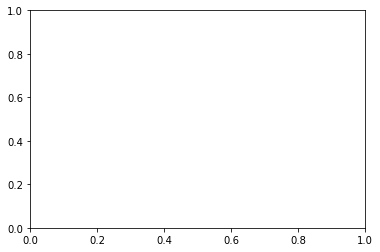

In [68]:
plt.scatter(energy,index,data=df)

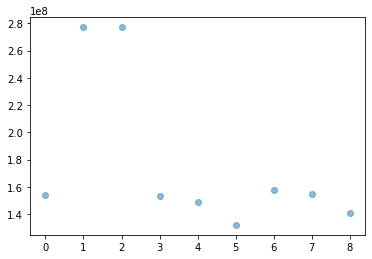

In [69]:
plt.scatter(df['index'], df['energy'], alpha=0.5)


In [70]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
result1=smf.ols(formula="energy ~ index", data=df).fit()



In [71]:
energy
index
0
154258392.0
0
1
277110129.0
1
2
277110129.0
2
3
153012543.0
3
4
148936301.0
4
5
132032718.0
5
6
157792524.0
6
7
155058463.0
7
8
140804616.0
8

8

In [72]:
df2 = pd.DataFrame(np.array([[1, 154258392.0],[2, 154258392.0], [3, 157258392.0], [4,158110129.0], [5,158110129.0],[6,155012543.0],[7,159936301.0],[8,154032718.0],[9,155792524.0],[10,153110129.0], [11,152110129.0],[12,151012543.0],[13,150936301.0],[14,149032718.0],[15,148792524.0] ,[16, 149258392.0], [17,151110129.0], [18,147110129.0],[19,146012543.0],[20,143936301.0],[21,140032718.0],[22,142792524.0],[23,144110129.0], [24,142110129.0],[25,141012543.0],[26,140936301.0],[27,132032718.0],[28,139792524.0]]),
                   columns=['index', 'energy_produced'])

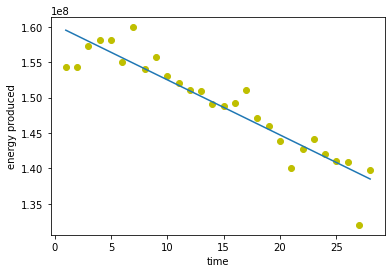

In [73]:
import matplotlib.pyplot as plt

plt.scatter(x= 'index',y='energy_produced',color='y',data=df2)
plt.plot(df2['index'],1.603e+08 + -7.781e+05*df2['index'],'-')
plt.xlabel('time')
plt.ylabel('energy produced')
plt.show()


In [74]:
df2


,index,energy_produced
0,1.0,154258392.0
1,2.0,154258392.0
2,3.0,157258392.0
3,4.0,158110129.0
4,5.0,158110129.0
5,6.0,155012543.0
6,7.0,159936301.0
7,8.0,154032718.0
8,9.0,155792524.0
9,10.0,153110129.0


In [75]:
result1=smf.ols(formula="energy_produced ~ index", data=df2).fit()

In [76]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        energy_produced   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     160.3
Date:                Sat, 11 Dec 2021   Prob (F-statistic):           1.26e-12
Time:                        19:07:15   Log-Likelihood:                -452.57
No. Observations:                  28   AIC:                             909.1
Df Residuals:                      26   BIC:                             911.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.603e+08   1.02e+06    157.138      0.000    1.58e+08    1.62e+08
index      -7.781e+05   6.15e+04    -12.662      0.000   -9.04e+05   -6.52e+05
==============================================================================
Omnibus:                        8.648   Durbin-Watson:                   1.577
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                6.966
Skew:                          -0.970   Prob(JB):                       0.0307
Kurtosis:                       4.484   Cond. No.                         34.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""